In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('ex1data1.txt',header=None);
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [19]:
X=data[0]
Y=data[1]

In [20]:
def hypo(theta,X):
    return theta[0]+theta[1]*X

In [21]:
def gradDesc(theta,X,Y,alpha,ite):
    n=len(X)
    cost=[]
    for i in range(ite):
        h=hypo(theta,X)
        cost.append((.5/n)*np.sum(h-Y)**2)
        theta[0]=theta[0]-((alpha/n)*np.sum((h-Y)))
        theta[1]=theta[1]-((alpha/n)*np.sum((h-Y)*X))
    return cost,theta

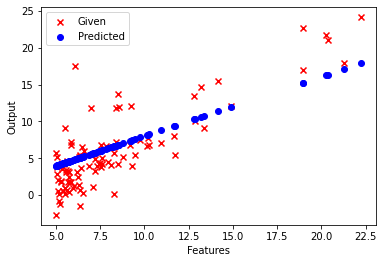

In [36]:
cost,theta=gradDesc([0,0],X,Y,0.0001,2000)
pred_y=hypo(theta,X)
plt.scatter(X,Y,marker='x',color='red',label="Given")
plt.scatter(X,pred_y,marker='o',color='blue',label="Predicted")
plt.xlabel("Features")
plt.ylabel("Output")
plt.legend()
plt.show()

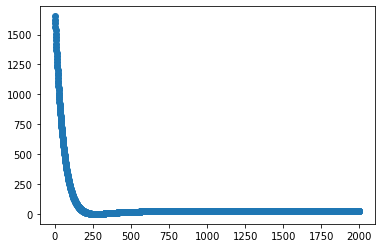

In [37]:
plt.scatter(range(0,len(cost)),cost)

# Multiple Variable

In [42]:
data=pd.read_csv('ex1data2.txt',header=None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [43]:
data.insert(0,"01",1)

In [44]:
data.head()

,01,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [45]:
X=data.drop(columns=2)

In [46]:
X.head()

,01,0,1
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [47]:
data.head()

,01,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [48]:
Y=data.iloc[:,3]

In [49]:
Y=Y/max(Y)

In [50]:
Y.head()

0    0.571367
1    0.471353
2    0.527218
3    0.331476
4    0.771396
Name: 2, dtype: float64

In [51]:
X[0]=X[0]/max(X[0])

In [52]:
X.head()

,01,0,1
0,1,0.469853,3
1,1,0.357302,3
2,1,0.535954,3
3,1,0.316213,2
4,1,0.669942,4


In [53]:
theta=[0]*len(X.columns)
theta

[0, 0, 0]

In [54]:
def hypo(theta,X):
    return theta*X

In [62]:
h=hypo(theta,X)
h.head()

,01,0,1
0,0.124937,0.247202,0.119172
1,0.124937,0.187986,0.119172
2,0.124937,0.281979,0.119172
3,0.124937,0.166368,0.079448
4,0.124937,0.352474,0.158896


In [63]:
def computeCost(X, Y, theta):
    y1 = hypo(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-Y)**2))/(2*47)

In [74]:
def grad_desc(theta,alpha,ite,X,Y):
    n=len(X)
    J=[]
    for j in range(ite):
        J.append(computeCost(X,Y,theta))
        for i in range(0,len(theta)):
            hx=hypo(theta,X)
            hx=hx.sum(axis=1)
#             print(hx)
            if(i==0):
                x=[1]*n
                theta[i]=theta[i]-(alpha/n)*(np.sum((hx-Y)*x))
            else:
                theta[i]=theta[i]-(alpha/n)*(np.sum((hx-Y)*X[i-1]))
    return theta,J
theta,J=grad_desc(theta,0.01,20000,X,Y)

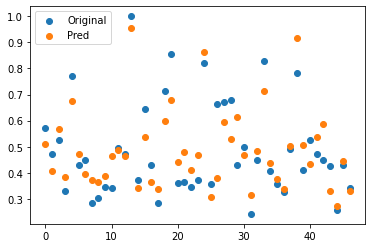

In [75]:
y_pred=hypo(theta,X)
y_pred=np.sum(y_pred,axis=1)
plt.scatter(x=list(range(0,47)),y=Y,label="Original")
plt.scatter(x=list(range(0,47)),y=y_pred,label="Pred")
plt.legend()
plt.show()

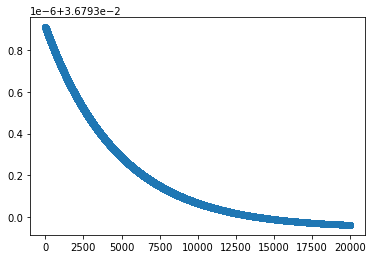

In [76]:
plt.scatter(x=list(range(0,len(J))),y=J)
plt.show()